In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20)

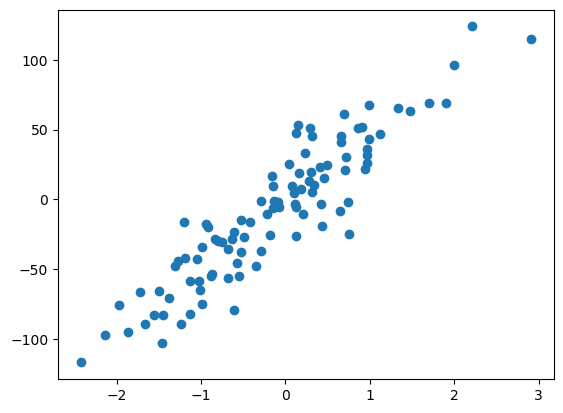

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[46.36700006]
-3.033705901096547


In [8]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9360057635914311

In [9]:
np.mean(cross_val_score(lr, X, y, scoring = 'r2', cv = 10))

0.7118655957079703

In [10]:
m = 80.06

In [11]:
class GDregressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
         # Calculate the b using GD
         for i in range(self.epochs):
             loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
             loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())

             
             self.b = self.b - (self.lr * loss_slope_b)
             self.m = self.m - (self.lr * loss_slope_m)
             
         print(self.m, self.b)    

    def predict(self,X):
        return self.m * X + self.b

In [12]:
gd = GDregressor(0.001, 50)

In [13]:
gd.fit(X_train, y_train)

46.355944937629964 -3.0537032149581043


In [14]:
gd.predict(X)

array([[ -94.64569073],
       [ -89.34100131],
       [  -7.27390595],
       [ -34.74399234],
       [  38.82951825],
       [  31.57362198],
       [  11.72798105],
       [ -67.20775334],
       [  42.58015796],
       [  58.74573171],
       [  29.69289973],
       [ -58.9232849 ],
       [ 132.04881061],
       [ -41.80973998],
       [  84.94058716],
       [   6.4918064 ],
       [ -72.39222115],
       [ -11.44456415],
       [ -63.74981292],
       [  48.98828594],
       [  99.66480007],
       [  15.66571129],
       [-102.11022427],
       [  12.82269076],
       [  10.94176187],
       [  -8.01114762],
       [ -25.78977857],
       [-115.63458614],
       [   7.88973922],
       [ -70.25330587],
       [  19.66559044],
       [ -46.58467307],
       [ -38.16302203],
       [ -50.51452218],
       [ -32.44114438],
       [ -55.71410213],
       [ -62.10356808],
       [  41.82129291],
       [ -48.80761798],
       [ -22.38441174],
       [ -28.52335207],
       [ -75.410

In [15]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9359706904984707